<a href="https://colab.research.google.com/github/skywalker0803r/crypto/blob/main/%E5%9B%9E%E6%B8%AC%E5%88%86%E6%9E%90%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3(Leo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

In [2]:
#!pip install finlab_crypto
#!pip install finta

In [3]:
import numpy as np
import finlab_crypto
from finlab_crypto import Strategy

In [5]:
pair = 'BTCUSDT'
freq = '15m'
ohlcv = finlab_crypto.crawler.get_all_binance(pair,freq)
ohlcv

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061,1.502943e+12,9.333621e+03,9.0,0.489061,2.089105e+03,7958.417415
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865,1.502944e+12,3.889113e+04,40.0,3.447113,1.470393e+04,7922.579933
2017-08-17 04:30:00+00:00,4280.00,4310.07,4267.99,4310.07,21.923552,1.502945e+12,9.408092e+04,58.0,20.421317,8.762098e+04,7912.494217
2017-08-17 04:45:00+00:00,4310.07,4313.62,4291.37,4308.83,13.948531,1.502946e+12,6.006047e+04,64.0,10.803012,4.653846e+04,7887.635513
2017-08-17 05:00:00+00:00,4308.83,4328.69,4304.31,4304.31,5.101153,1.502947e+12,2.200653e+04,44.0,3.496635,1.509378e+04,7865.654419
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-24 07:45:00+00:00,22763.48,22777.49,22690.00,22701.60,1072.844530,1.658650e+12,2.439326e+07,31057.0,454.549450,1.033506e+07,0.000000
2022-07-24 08:00:00+00:00,22704.09,22744.37,22627.88,22671.28,1330.244970,1.658650e+12,3.016070e+07,42733.0,641.033570,1.453367e+07,0.000000
2022-07-24 08:15:00+00:00,22670.46,22676.97,22590.01,22625.72,1004.665980,1.658651e+12,2.273205e+07,36097.0,508.754530,1.151170e+07,0.000000


In [7]:
import finta
from finta import TA
ohlcv = ohlcv[['open','high','low','close','volume']]
ohlcv

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865
2017-08-17 04:30:00+00:00,4280.00,4310.07,4267.99,4310.07,21.923552
2017-08-17 04:45:00+00:00,4310.07,4313.62,4291.37,4308.83,13.948531
2017-08-17 05:00:00+00:00,4308.83,4328.69,4304.31,4304.31,5.101153
...,...,...,...,...,...
2022-07-24 07:45:00+00:00,22763.48,22777.49,22690.00,22701.60,1072.844530
2022-07-24 08:00:00+00:00,22704.09,22744.37,22627.88,22671.28,1330.244970
2022-07-24 08:15:00+00:00,22670.46,22676.97,22590.01,22625.72,1004.665980


# KD

In [18]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['K'] = TA.STOCH(ohlcv,period=9)
df['D'] = TA.STOCHD(ohlcv,period=3,stoch_period=9)
df.tail()

,K,D
timestamp,,
2022-07-24 07:45:00+00:00,33.737132,55.576494
2022-07-24 08:00:00+00:00,20.461082,41.130619
2022-07-24 08:15:00+00:00,14.285143,22.827785
2022-07-24 08:30:00+00:00,25.906055,20.217426
2022-07-24 08:45:00+00:00,45.227928,28.473042


# STOCHRSI

In [19]:
df['STOCHRSI'] = TA.STOCHRSI(ohlcv,rsi_period=14,stoch_period=14)
df.tail()

,K,D,STOCHRSI
timestamp,,,
2022-07-24 07:45:00+00:00,33.737132,55.576494,0.640026
2022-07-24 08:00:00+00:00,20.461082,41.130619,0.645371
2022-07-24 08:15:00+00:00,14.285143,22.827785,0.647384
2022-07-24 08:30:00+00:00,25.906055,20.217426,0.639461
2022-07-24 08:45:00+00:00,45.227928,28.473042,0.631600


# MACD

In [37]:
#A bullish crossover occurs when the MACD turns up and crosses above the signal line.
#A bearish crossover occurs when the MACD turns down and crosses below the signal line.
TA.MACD(ohlcv,period_fast=6,period_slow=13)
df['MACD'] = TA.MACD(ohlcv,period_fast=6,period_slow=13)['MACD']
df['SIGNAL'] = TA.MACD(ohlcv,period_fast=6,period_slow=13)['SIGNAL']
df

,K,D,STOCHRSI,MACD,SIGNAL
timestamp,,,,,
2017-08-17 04:00:00+00:00,NaN,NaN,NaN,0.000000,0.000000
2017-08-17 04:15:00+00:00,NaN,NaN,NaN,-0.001346,-0.000748
2017-08-17 04:30:00+00:00,NaN,NaN,NaN,3.096176,1.268483
2017-08-17 04:45:00+00:00,NaN,NaN,NaN,4.070624,2.217718
2017-08-17 05:00:00+00:00,NaN,NaN,NaN,3.936561,2.729035
...,...,...,...,...,...
2022-07-24 07:45:00+00:00,33.737132,55.576494,0.640026,51.349883,59.383881
2022-07-24 08:00:00+00:00,20.461082,41.130619,0.645371,37.693954,55.045896
2022-07-24 08:15:00+00:00,14.285143,22.827785,0.647384,21.286081,48.293933


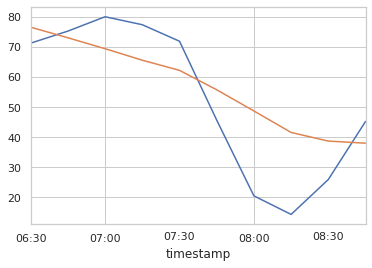

In [70]:
import matplotlib.pyplot as plt

df['K'][-10:].plot()
df['D'][-10:].plot()
plt.show()

In [48]:
df.dropna()

,K,D,STOCHRSI,MACD,SIGNAL
timestamp,,,,,
2017-08-17 07:30:00+00:00,15.957840,49.178966,0.667727,-1.322155,3.007616
2017-08-17 07:45:00+00:00,100.000000,52.468803,0.713462,4.276684,3.268780
2017-08-17 08:00:00+00:00,81.048209,52.047396,0.689154,8.932616,4.427643
2017-08-17 08:15:00+00:00,81.037152,59.414410,0.666752,11.402759,5.848257
2017-08-17 08:30:00+00:00,81.026095,60.946354,0.650946,12.439717,7.185826
...,...,...,...,...,...
2022-07-24 07:45:00+00:00,50.573235,58.416946,0.640026,51.349883,59.383881
2022-07-24 08:00:00+00:00,33.800275,53.119531,0.645371,37.693954,55.045896
2022-07-24 08:15:00+00:00,14.285143,46.041973,0.647384,21.286081,48.293933


In [51]:
ohlcv

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865
2017-08-17 04:30:00+00:00,4280.00,4310.07,4267.99,4310.07,21.923552
2017-08-17 04:45:00+00:00,4310.07,4313.62,4291.37,4308.83,13.948531
2017-08-17 05:00:00+00:00,4308.83,4328.69,4304.31,4304.31,5.101153
...,...,...,...,...,...
2022-07-24 07:45:00+00:00,22763.48,22777.49,22690.00,22701.60,1072.844530
2022-07-24 08:00:00+00:00,22704.09,22744.37,22627.88,22671.28,1330.244970
2022-07-24 08:15:00+00:00,22670.46,22676.97,22590.01,22625.72,1004.665980


  0%|          | 0/64 [00:00<?, ?it/s]

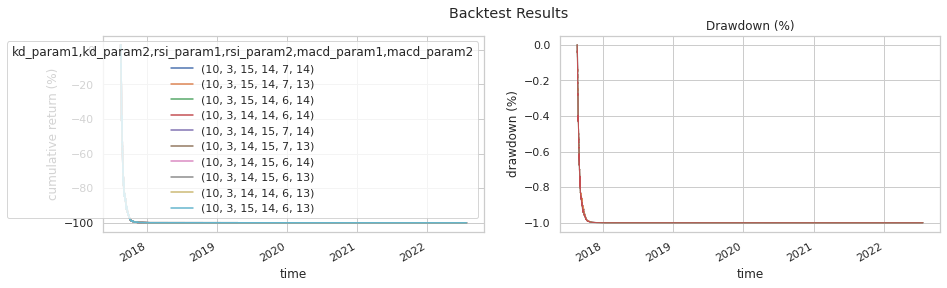

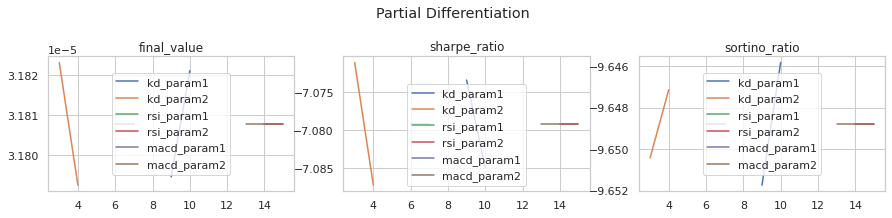

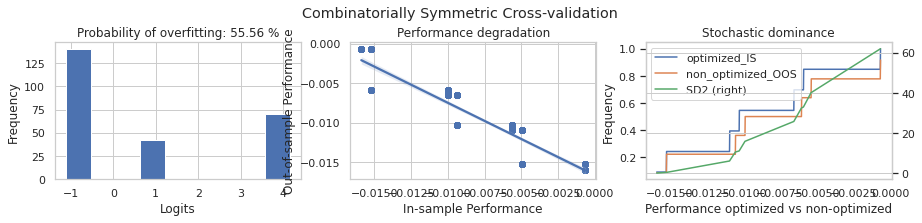

Output()

In [64]:
import numpy as np
import finlab_crypto
from finlab_crypto import Strategy

# config
pairs = ['BTCUSDT','ETHUSDT','LTCUSDT','BNBUSDT'] #交易對
freq = '15m' #資料頻率
n1n2 = {}
for i in pairs:
  n1n2[i] = []

def Optimization(ohlcv,pair,freq):
  # 歷史價格數據
  ohlcv = ohlcv.dropna()
  #ohlcv = finlab_crypto.crawler.get_all_binance(pair,freq).dropna()

  #定義策略
  @Strategy(kd_param1=9,kd_param2=3,rsi_param1=14,rsi_param2=14,macd_param1=6,macd_param2=13)
  def sma_strategy(ohlcv):
    df['K'] = TA.STOCH(ohlcv,period=sma_strategy.kd_param1)
    df['D'] = TA.STOCHD(ohlcv,period=sma_strategy.kd_param1,stoch_period=sma_strategy.kd_param2)
    df['STOCHRSI'] = TA.STOCHRSI(ohlcv,rsi_period=sma_strategy.rsi_param1,stoch_period=sma_strategy.rsi_param2)
    df['MACD'] = TA.MACD(ohlcv,period_fast=sma_strategy.macd_param1,period_slow=sma_strategy.macd_param2)['MACD']
    df['SIGNAL'] = TA.MACD(ohlcv,period_fast=sma_strategy.macd_param1,period_slow=sma_strategy.macd_param2)['SIGNAL']
    # 定義策略進出場條件
    K = df['K']
    D = df['D']
    RSI = df['STOCHRSI']
    MACD = df['MACD']
    MACD_SIGNAL = df['SIGNAL']
    
    entries_KD = (K >= D) & (K.shift() <= D.shift())
    entries_RSI = (RSI < 80) & (RSI > 20)
    entries_MACD = (MACD > MACD_SIGNAL) & (MACD.shift() < MACD_SIGNAL.shift())

    exit_KD = (K <= D) & (K.shift() >= D.shift())
    exit_RSI = (RSI > 80) & (RSI < 20)
    exit_MACD = (MACD < MACD_SIGNAL) & (MACD.shift() > MACD_SIGNAL.shift())
    
    entries = entries_KD
    exits = exit_KD
    #figures = {'overlaps': {'K': K,'D': D}}
    return entries, exits#, figures

  # 策略超參數
  variables = {'kd_param1': np.arange(9,11,1), 
              'kd_param2': np.arange(3,5,1),
               'rsi_param1':np.arange(14,16,1),
               'rsi_param2':np.arange(14,16,1),
               'macd_param1':np.arange(6,8,1),
               'macd_param2':np.arange(13,15,1),
              }

  #回測及優化
  portfolio = sma_strategy.backtest(ohlcv, variables=variables, freq=freq ,plot=True)
  #temp = portfolio.total_profit()[portfolio.total_profit()==portfolio.total_profit().max()].to_frame().reset_index()
  #n1n2[pair] = [temp['kd_param1'].values[0],temp['kd_param2'].values[0]]

Optimization(ohlcv,pair[0],freq)

In [65]:
n1n2

{'BNBUSDT': [], 'BTCUSDT': [], 'ETHUSDT': [], 'LTCUSDT': []}